SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [45]:
from sklearn.datasets import make_classification

In [46]:
x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=12)

In [47]:
x.shape, y.shape

((1000, 2), (1000,))

In [48]:
y==0

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [49]:
import pandas as pd

df1 = pd.DataFrame(x, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(y, columns=['target'])

In [50]:
df1

,feature1,feature2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [51]:
df2

,target
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [52]:
df = pd.concat([df1, df2], axis=1)

In [53]:
df

,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [54]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

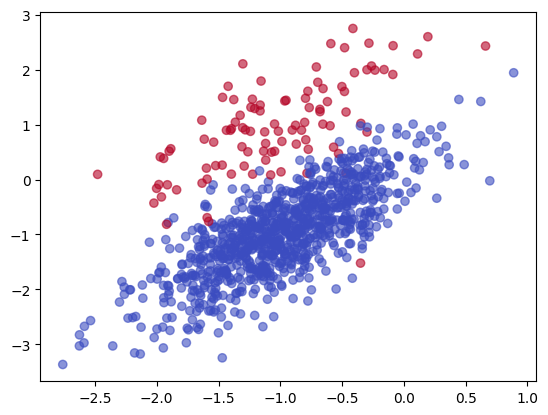

In [55]:
# Imbalanced dataset    
import matplotlib.pyplot as plt
plt.scatter(df['feature1'], df['feature2'], c=df['target'], cmap='coolwarm', alpha=0.6)

In [56]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

In [57]:
# transform dataset using SMOTE
oversample = SMOTE()    
x,y = oversample.fit_resample(df[['feature1', 'feature2']], df['target'])

In [58]:
x.shape, y.shape

((1800, 2), (1800,))

In [59]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [60]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [61]:
len(y[y==0])

900

In [62]:
len(y[y==1])

900

In [63]:
df1 = pd.DataFrame(x, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(y, columns=['target'])
oversampled_df = pd.concat([df1, df2], axis=1)

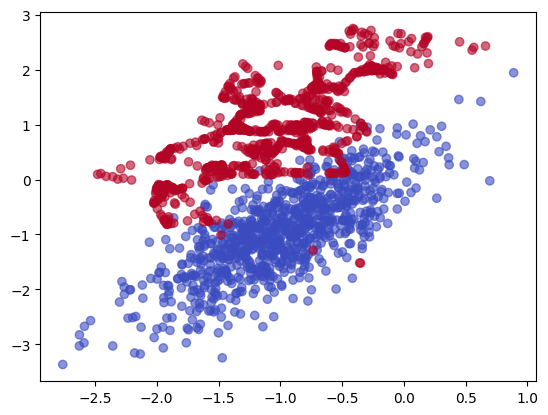

In [64]:
plt.scatter(oversampled_df['feature1'], oversampled_df['feature2'], c=oversampled_df['target'], cmap='coolwarm', alpha=0.6)